In [5]:
%matplotlib inline

Found 5 images to process.


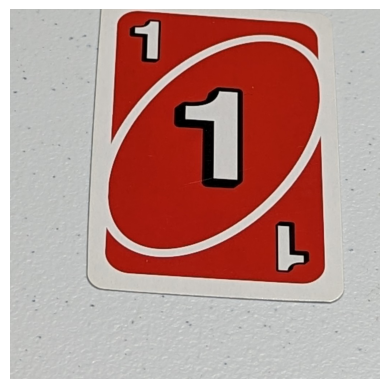

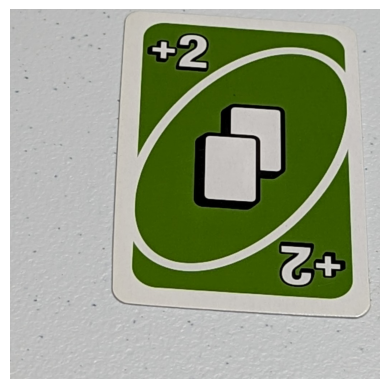

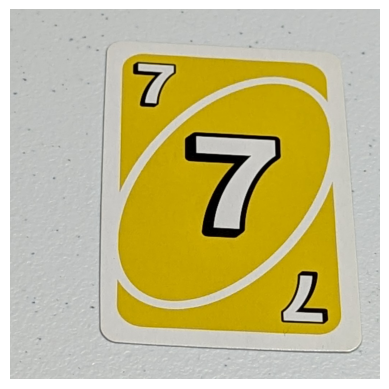

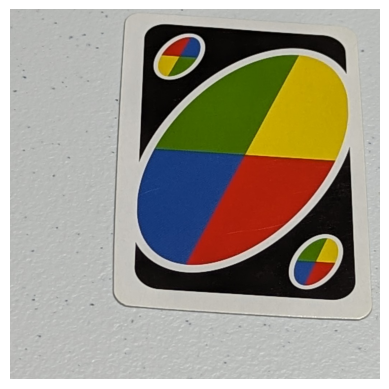

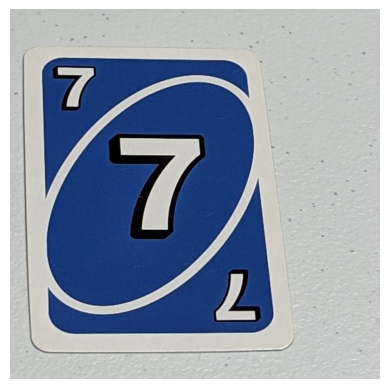

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Make sure images are displayed in Jupyter notebooks
%matplotlib inline

# Function to perform a center crop of 128x128 pixels
def center_crop_image(image):
    width, height = image.size
    new_width, new_height = 1024, 1024
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    return image.crop((left, top, right, bottom))

folder = '/home/tho121/selflabel/uno_imgs'

# Assuming the images are in the current working directory of the notebook
image_files = [file for file in os.listdir(folder) if file.endswith('.jpg')]

print(f"Found {len(image_files)} images to process.")

# Display and store the cropped images
max_count = 20
count = 0
for image_file in image_files:
    try:
        with Image.open(os.path.join(folder, image_file)) as img:
            cropped_img = center_crop_image(img)
            # Display the cropped image
            plt.imshow(cropped_img)
            plt.axis('off')
            plt.show()
            count += 1
            if count > max_count:
                break
    except Exception as e:
        print(f"An error occurred with image {image_file}: {e}")


In [9]:
# Save the cropped images with a new name
target_size = (128, 128)
new_folder = 'uno_5'
os.makedirs(new_folder, exist_ok=True)  # Create the directory if it doesn't exist

for image_file in image_files:
    with Image.open(os.path.join(folder, image_file)) as img:
        cropped_img = center_crop_image(img)
        # Saving the cropped image with a suffix '_cropped'
        resized_img = cropped_img.resize(target_size, Image.Resampling.LANCZOS)
        new_file_path = os.path.join(new_folder, image_file.replace('.jpg', '_modified.jpg'))
        # Save the cropped and resized image
        resized_img.save(new_file_path)


In [7]:
import os
import shutil
from pathlib import Path

# Function to copy each file in the source directory 100 times to the destination directory
def copy_files_generic(src, dest, multiplier):
    # Create the destination directory if it does not exist
    os.makedirs(dest, exist_ok=True)
    
    # Iterate through each file in the source directory
    for file_path in Path(src).iterdir():
        if file_path.is_file():
            # Copy each file 100 times
            for i in range(multiplier):
                # Construct new file name with a copy number
                new_file_name = f"{file_path.stem}_{i+1:03d}{file_path.suffix}"
                # Perform the copy operation
                shutil.copy(file_path, Path(dest) / new_file_name)

# Specify the source and destination directories
src_dir = "/home/tho121/selflabel/self-label/uno_all_processed"  # Replace with your source folder path
dest_dir = "/home/tho121/selflabel/self-label/data/uno_all"  # Replace with your destination folder path

# Call the function with the specified source and destination
copy_files_generic(src_dir, dest_dir, 5)


In [10]:
import os
import shutil
from pathlib import Path

# Function to copy each file in the source directory 'some_number' of times to a new folder in the destination directory
def copy_files_to_unique_folders(src, dest, some_number):
    # Create the destination directory if it does not exist
    os.makedirs(dest, exist_ok=True)
    
    # Iterate through each file in the source directory
    for file_path in Path(src).iterdir():
        if file_path.is_file():
            # Create a unique directory for each file in the destination directory
            file_dest_dir = Path(dest) / file_path.stem
            os.makedirs(file_dest_dir, exist_ok=True)
            
            # Copy each file 'some_number' of times
            for i in range(some_number):
                # Construct new file name with a copy number
                new_file_name = f"{file_path.stem}_{i+1:03d}{file_path.suffix}"
                # Perform the copy operation
                shutil.copy(file_path, file_dest_dir / new_file_name)

# Specify the source and destination directories
src_dir = "/home/tho121/selflabel/self-label/uno_5"  # Replace with your source folder path
dest_dir = "/home/tho121/selflabel/self-label/data/uno_labled_5"  # Replace with your destination folder path

# Specify the number of copies for each file
some_number = 100  # Replace with the number of copies you want

# Call the function with the specified source and destination
copy_files_to_unique_folders(src_dir, dest_dir, some_number)
